In [1]:
from model_nn.net import net
from model_nn.create_model import create_model, load_checkpoint
from model_nn.trains import train, perf_measure, find_classes
from Random_forest_baseline.loader.loader import train_transforms_prepare, test_transforms_prepare
import torch
from torchvision import datasets
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
data_dir = 'Random_forest_baseline/Splited_dataset'
test_dir = data_dir + '/test'

test_transforms = test_transforms_prepare(size=(256,256), center_crop=236, normalize_mean=(0,0,0), normalize_std=(1,1,1))

test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

testloader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=True)

model = load_checkpoint('./model_nn/cp.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
names = find_classes('./test')

In [4]:
perf_measure(model, testloader)

Test accuracy of model: 91.478%


In [ ]:
cf_acc = np.zeros((48,48))
cf_total = np.zeros((48,48))
for data in testloader:
    
        images, labels = data
        # Get probabilities
        
        outputs = model(images)
        # Turn probabilities into predictions
        _, predicted_outcome = torch.max(outputs.data, 1)
        
        cf_acc[int(labels)][int(predicted_outcome)] += 1
        cf_total[int(labels)][int(predicted_outcome)] += 1

In [ ]:
# devide the rows to get % acc
for i in range(48):
    t = 0
    for j in cf_acc[i]:
        t += j
    cf_acc[i] = cf_acc[i] / t

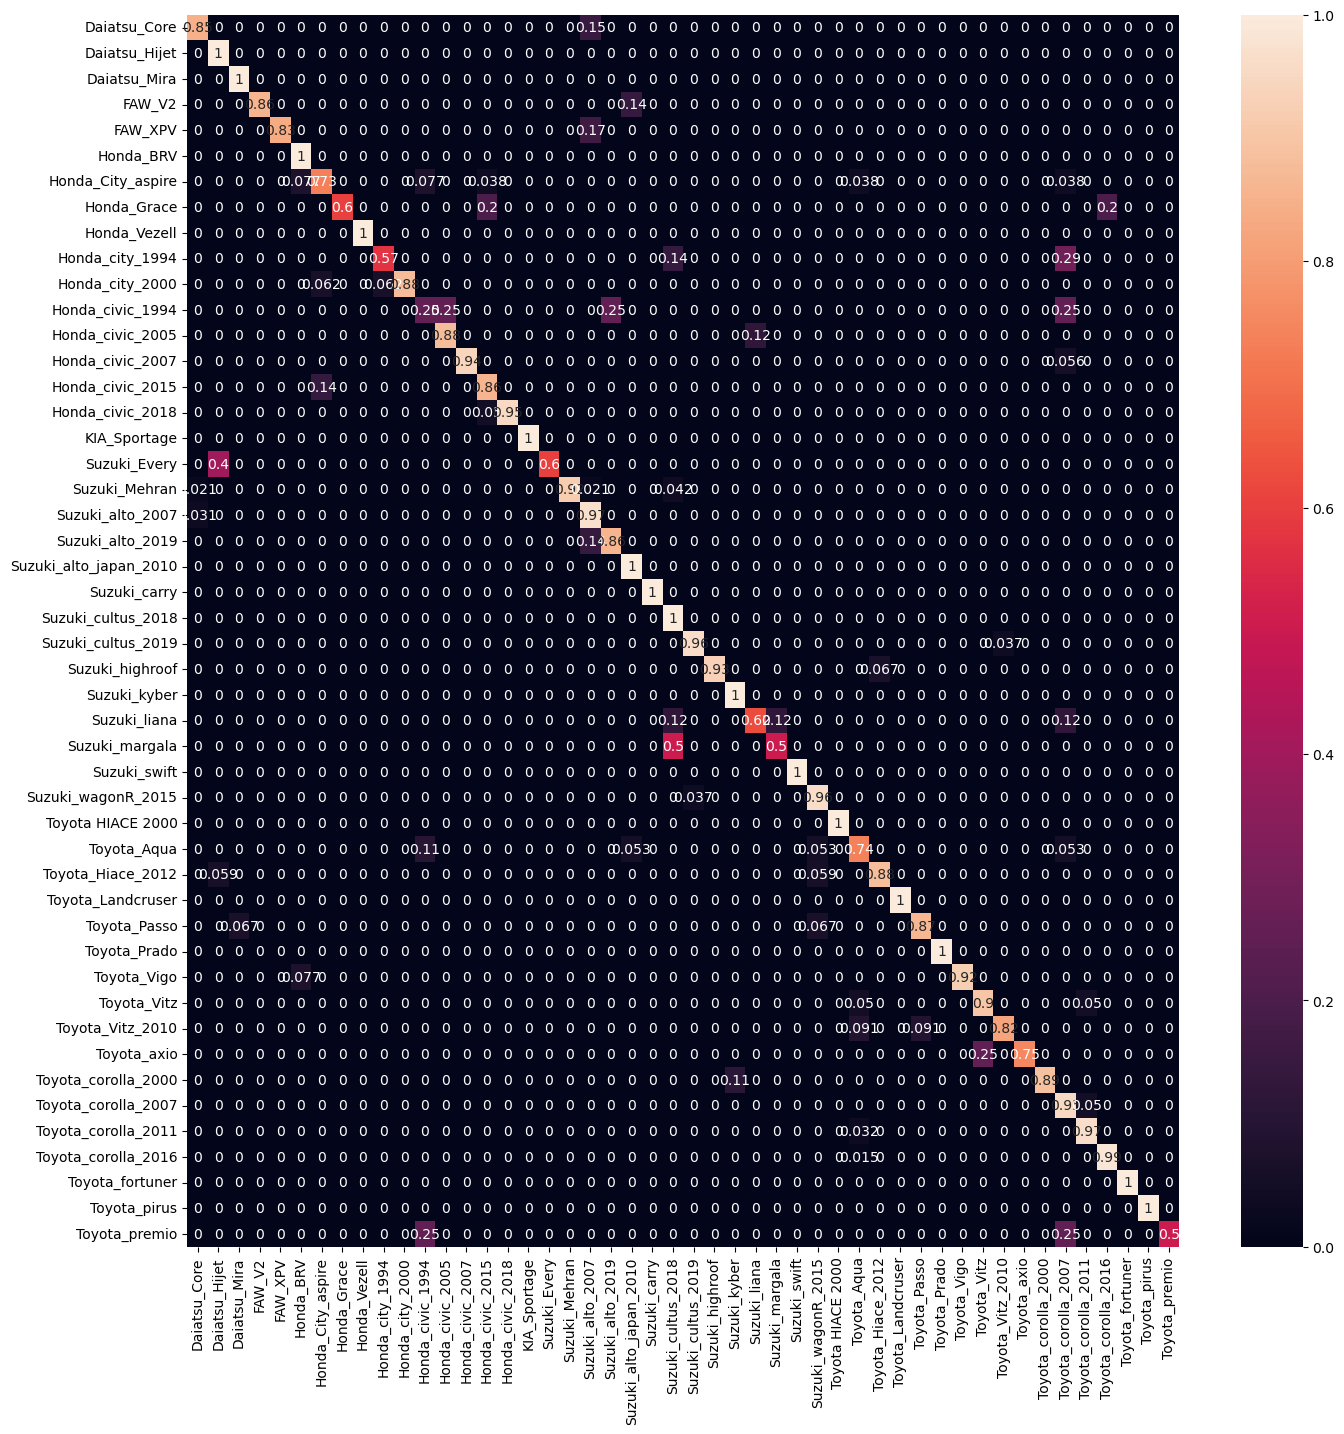

In [85]:
# accuracy confusion matrix
# the x axis is the base truth, the y is the predicted
df_cm_acc = pd.DataFrame(cf_acc, index = [i for i in names[0]],
                     columns = [i for i in names[0]])
plt.figure(figsize = (16,16))
sn.heatmap(df_cm_acc, annot=True)

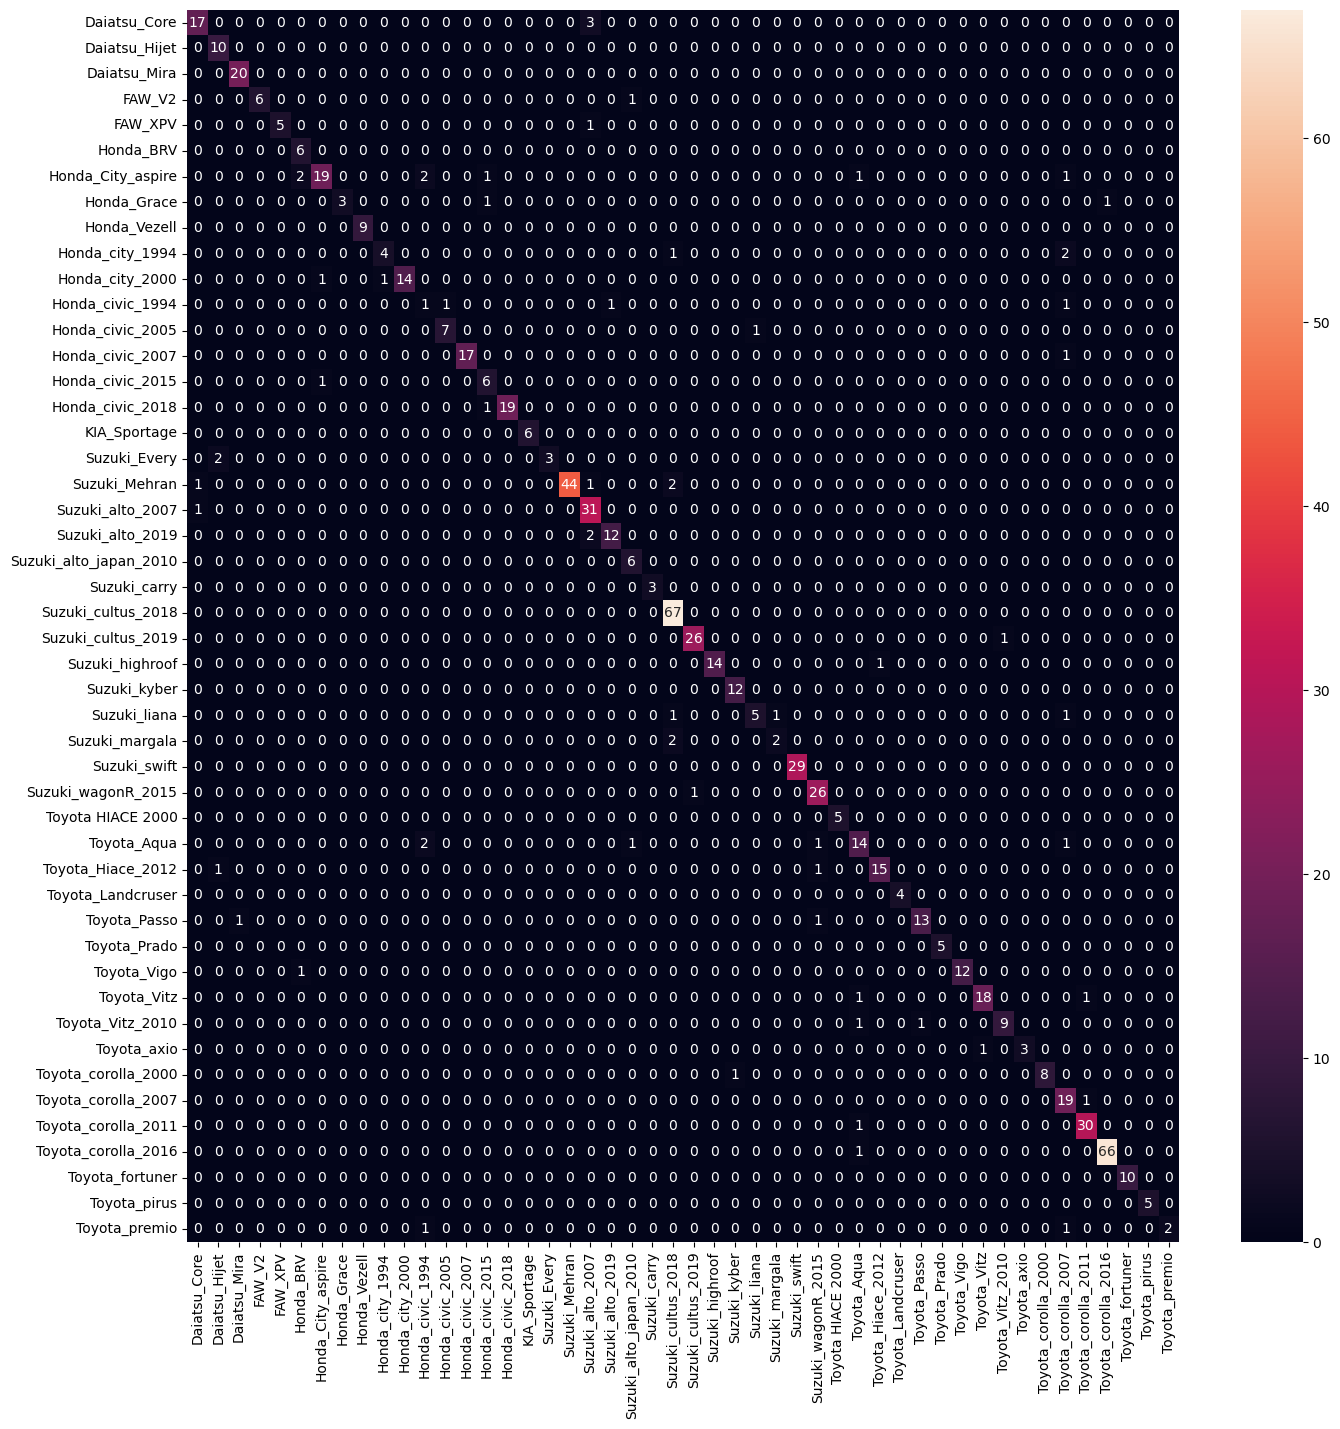

In [84]:
# the confusion matrix
df_cm_total = pd.DataFrame(cf_total, index = [i for i in names[0]],
                     columns = [i for i in names[0]])
plt.figure(figsize = (16,16))
sn.heatmap(df_cm_total, annot=True)

In [77]:
for predicted in names[0]:
    for true in names[0]:
        if df_cm[predicted][true] > 0.39:
            print("{:.2f}% of the times the prediction was {} while the truth is {}".format(df_cm[predicted][true]*100, predicted, true))

85.00% of the times the prediction was Daiatsu_Core while the truth is Daiatsu_Core
100.00% of the times the prediction was Daiatsu_Hijet while the truth is Daiatsu_Hijet
40.00% of the times the prediction was Daiatsu_Hijet while the truth is Suzuki_Every
100.00% of the times the prediction was Daiatsu_Mira while the truth is Daiatsu_Mira
85.71% of the times the prediction was FAW_V2 while the truth is FAW_V2
83.33% of the times the prediction was FAW_XPV while the truth is FAW_XPV
100.00% of the times the prediction was Honda_BRV while the truth is Honda_BRV
73.08% of the times the prediction was Honda_City_aspire while the truth is Honda_City_aspire
60.00% of the times the prediction was Honda_Grace while the truth is Honda_Grace
100.00% of the times the prediction was Honda_Vezell while the truth is Honda_Vezell
57.14% of the times the prediction was Honda_city_1994 while the truth is Honda_city_1994
87.50% of the times the prediction was Honda_city_2000 while the truth is Honda_cit